# Machine Learning Engineer Nanodegree 2020
## Capstone Project
Ashish kumar<br>February 18, 2020
## Time Series Analysis of Air Quality Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import math
import glob
import matplotlib.pyplot as plt
%matplotlib inline


## Selecting Best Dataset

The data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. So we can choose any of the given monitoring site dataset to work upon. <br><br> Instead of randomly picking any dataset, It is better to look for the null values. Lesser the null values, better will be the predictions.<br><br> Let us build Helper function for finding the best dataset with respect to null values. The idea is to compare the average of row-wise average null values of each multi-site data file

In [2]:
data_path = 'beijing-multisite-airquality-data-set'
# storing names of all datafiles
file_names = [file_name[len(data_path)+1:] for file_name in glob.glob(data_path + '/*.csv')]
for file_name in file_names: print(file_name)

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [3]:
from shutil import copyfile

def best_data_file(data_files, cache_file = ''):
    
    # create directory for storing the dataset
    if not os.path.exists('dataset'):
        os.mkdir('dataset')
    
    if os.listdir('dataset'):
        # read from the cache file
        cache_file = os.listdir('dataset')[0]
        print('Reading from cache file: dataset/',cache_file, sep='')
        return cache_file
    
    # Do the heavy lifting
    best_file = ''
    Min_average = math.inf 
    for file_name in data_files:
        # Reading each datafile in dataframe
        df = pd.read_csv(data_path+'/'+file_name)
        
        # overall average = average of (average of null value col-wise )
        overall_average = df.isna().mean().mean()
        if overall_average < Min_average:
            Min_average = overall_average
            best_file = file_name
        # print(file_name)
        # print(overall_average)
        
        # for visualizing row-wise percentages of null values
        # print(df.isna().mean().round(4)*100)
    
    # copy the best file in the dataset folder
    src = os.path.join(data_path,best_file)
    dst = os.path.join('dataset',best_file)
    copyfile(src,dst)
    print('path created: '+dst)
    return best_file

In [4]:
# test the function
best_file = best_data_file(file_names)

Reading from cache file: dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv


## Data loading and Preprocesing
#### 1) Loading Data

In [5]:
# load data
df = pd.read_csv(os.path.join(data_path,best_file))
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


#### 2) Indexing Data

For time series analysis, Our data should be indexed as Date-Time. For this we will be using pandas DateTimeIndex function. It is important to note that the Time period of our data is from March 1st, 2013 to February 28th, 2017. Lets verify it before proceeding.

In [6]:
# 1st row
df[:1]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan


In [7]:
# last row
df[df.shape[0]-1:]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35063,35064,2017,2,28,23,10.0,28.0,7.0,48.0,600.0,39.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Nongzhanguan


In [8]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
No         35064 non-null int64
year       35064 non-null int64
month      35064 non-null int64
day        35064 non-null int64
hour       35064 non-null int64
PM2.5      34436 non-null float64
PM10       34624 non-null float64
SO2        34618 non-null float64
NO2        34372 non-null float64
CO         33858 non-null float64
O3         34558 non-null float64
TEMP       35044 non-null float64
PRES       35044 non-null float64
DEWP       35044 non-null float64
RAIN       35044 non-null float64
wd         34986 non-null object
WSPM       35050 non-null float64
station    35064 non-null object
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Since the columns year, month, day and hour didn't contain any null value, So we can use pandas DateTimeIndex function with start date-time as 2013-03-01 00:00:00 and end date-time as 2017-02-28 23:00:00. As our dataset contains hourly data so we can use freq as 'H' which stands for Hour.

In [9]:
# creating Date-Time index column
df['Date-Time'] = pd.DatetimeIndex(start = '2013-03-01 00:00:00',end = '2017-02-28 23:00:00',freq ='H')
# setting index as Date-Time
df.set_index('Date-Time', drop = True, inplace = True)

In [10]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Date-Time,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


#### 3) Removing unwanted columns

Since we are intrested in time-series analysis of air pollutants We should remove unwanted columns.
The six major air-pollutants are:
1) PM2.5
2) PM10
3) SO2
4) NO2
5) CO
6) O3
<br>Rest of the columns need to be ommited


In [11]:
wanted_col = ['PM2.5','PM10','SO2','NO2','CO','O3']
df = df[wanted_col]

In [12]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3
Date-Time,,,,,,
2013-03-01 00:00:00,5.0,14.0,4.0,12.0,200.0,85.0
2013-03-01 01:00:00,8.0,12.0,6.0,14.0,200.0,84.0
2013-03-01 02:00:00,3.0,6.0,5.0,14.0,200.0,83.0
2013-03-01 03:00:00,5.0,5.0,5.0,14.0,200.0,84.0
2013-03-01 04:00:00,5.0,5.0,6.0,21.0,200.0,77.0


#### 4) Handling Null values

We can handle null values for Time-series data using the following ways:<br>
##### By simply dropping
<br>We can simply drop the rows containing null values. But dropping null values is not always a good choice. We could miss important data points necessary for predictions. A better way is imputing values intead of dropping.<br>
##### By imputing values
<br>
<b>1) using mean </b><br> We can replace null values with mean value by particular month, year or the entire column. This may not be the best choice always especially if we are going to make several short and long time-series <br><br>
<b>2) using foreward fill</b><br> We can use pandas ffill() method for filling null values with next row not null value<br><br>
<b>3) using backward fill</b><br> We can use pandas bfill() method for filling null values with previous row not null value<br><br>
<b>4) using Interpolation </b><br>We can use Interpolate method of pandas to fill values according to different methods.<br>
I will be using linear Interpolate method which will fill null values with linear transition.  

In [13]:
# let us check column-wise null values: before
df.isnull().sum()

PM2.5     628
PM10      440
SO2       446
NO2       692
CO       1206
O3        506
dtype: int64

In [14]:
# let us apply interpolation
cleaned_df = df.interpolate()

In [15]:
# column-wise null values: after
cleaned_df.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
dtype: int64

Now we will create six data frames for the pollutants PM2.5, PM10, SO2, NO2, CO and O3 for Time-Series analysis.

In [16]:
# creating data-frame for PM2.5
df_PM25 = cleaned_df[['PM2.5']]
# creating data-frame for PM10
df_PM10 = cleaned_df[['PM10']]
# creating data-frame for SO2
df_SO2 = cleaned_df[['SO2']]
# creating data-frame for NO2
df_NO2 = cleaned_df[['NO2']]
# creating data-frame for CO
df_CO = cleaned_df[['CO']]
# creating data-frame for O3
df_O3 = cleaned_df[['O3']]

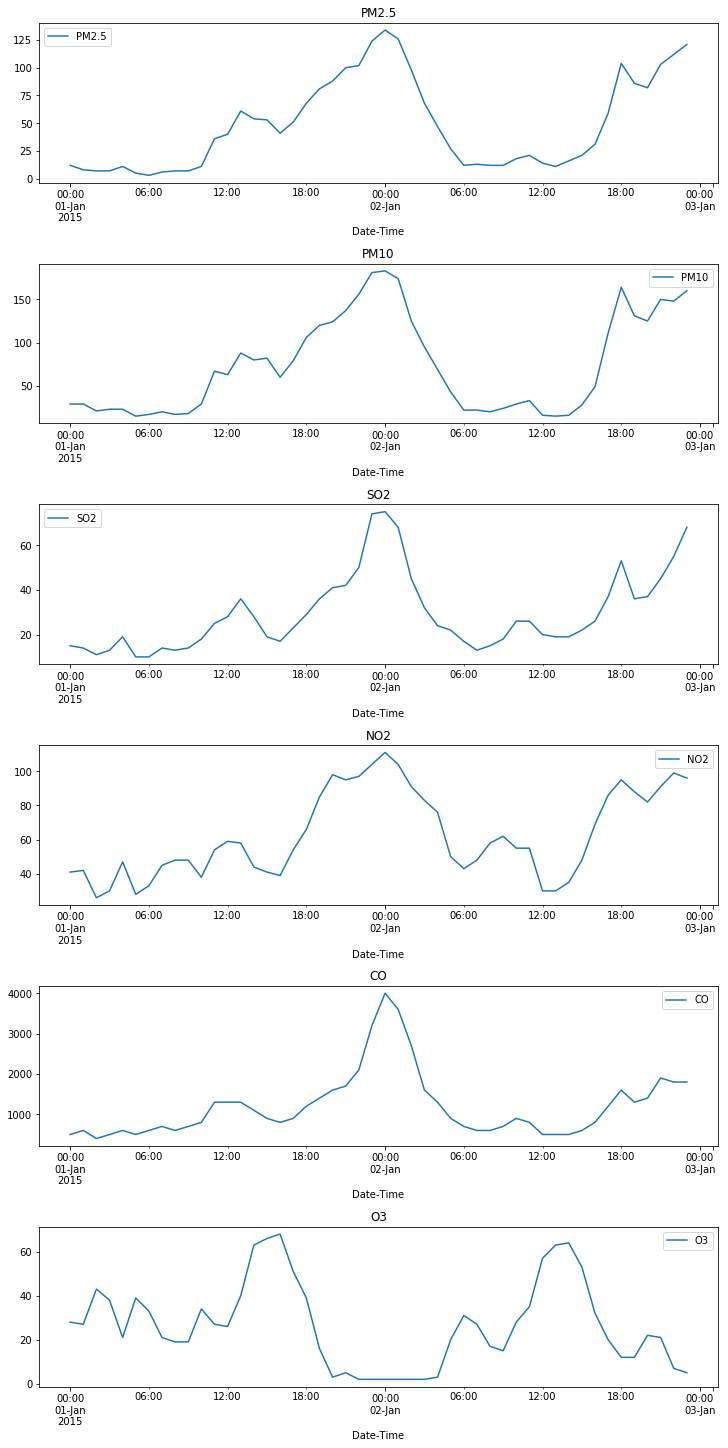

In [17]:
# let us visualize our created dataframes
df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]
fig, axes = plt.subplots(nrows = 6, ncols = 1, constrained_layout = True)
[df_list[i]['2015-01-01':'2015-01-02'].plot(ax = axes[i], figsize = (10,20), title = df_list[i].columns[0]) for i in range(len(df_list))]

Before applying Time-Series models We need to check whether our data is stationary or not.<br><br>
Note: We can still apply Seasonal ARIMA to non-stationary data but for applying LSTM we need datasets to be stationary.
We can check data stationarity using two tests:<br>1) ADF (Augmented Dickey Fuller) Test<br>2) KPSS  (Kwiatkowski-Phillips-Schmidt-Shin) Test<br> We will use the code to test ADF and KPSS from the site https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

### Checking for Data Stationarity

In [18]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



<b>Test for stationarity(ADF):</b> If the test statistic is less than the critical value, we can reject the null hypothesis. When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

#### KPSS test for Data Stationarity

In [19]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    

<b>Test for stationarity(KPSS):</b> If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary).

In [21]:
# checking data stationarity for different pollutants
for df in df_list:           # df_list = [df_PM25, df_PM10, df_SO2, df_NO2, df_CO, df_O3]
    print(df.columns.values[0],'\n')
    # Apply ADF
    adf_test(df.values[:,0])
    print()
    # Apply KPSS
    kpss_test(df.values[:,0])
    

PM2.5 

Results of Dickey-Fuller Test:
Test Statistic                   -19.231589
p-value                            0.000000
#Lags Used                        47.000000
Number of Observations Used    35016.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64

Results of KPSS Test:
Test Statistic            0.255091
p-value                   0.100000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
PM10 

Results of Dickey-Fuller Test:


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Test Statistic                   -19.370487
p-value                            0.000000
#Lags Used                        50.000000
Number of Observations Used    35013.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64

Results of KPSS Test:
Test Statistic            0.657745
p-value                   0.017387
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
SO2 

Results of Dickey-Fuller Test:
Test Statistic                -1.404938e+01
p-value                        3.197699e-26
#Lags Used                     5.100000e+01
Number of Observations Used    3.501200e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64

Results of KPSS Test:
Test Statis

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic                -1.828361e+01
p-value                        2.305463e-30
#Lags Used                     5.100000e+01
Number of Observations Used    3.501200e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64

Results of KPSS Test:
Test Statistic            0.863661
p-value                   0.010000
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
CO 

Results of Dickey-Fuller Test:


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic                -1.692879e+01
p-value                        9.812970e-30
#Lags Used                     5.000000e+01
Number of Observations Used    3.501300e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64

Results of KPSS Test:
Test Statistic            0.352639
p-value                   0.097569
Lags Used                52.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
O3 

Results of Dickey-Fuller Test:
Test Statistic                -1.118183e+01
p-value                        2.489966e-20
#Lags Used                     5.100000e+01
Number of Observations Used    3.501200e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64

Results of KPSS Test:
Test Statist

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


By Analysing the tests we can conclude that our datasets are stationary. Thus we completed data preprocessing We can now proceed furthur.

### Train-Test Split

Now it's time to split our time series data into train and test.  